In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import joblib as jb
import tkinter as *

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
#from xgboost import XGBRegressor 

warnings.filterwarnings('ignore')

In [128]:
run = r"C:\Users\user\Desktop\Car_Price\Cleaned_data.csv"

In [129]:
df = pd.read_csv(run)

In [130]:
df.drop(columns=["Unnamed: 0"], errors='ignore')

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,3.35,5.59,27000,0,0,0,0
1,4.75,9.54,43000,1,0,0,0
2,7.25,9.85,6900,0,0,0,0
3,2.85,4.15,5200,0,0,0,0
4,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
294,9.50,11.60,33988,1,0,0,0
295,4.00,5.90,60000,0,0,0,0
296,3.35,11.00,87934,0,0,0,0
297,11.50,12.50,9000,1,0,0,0


In [131]:
df.head(4)

,Unnamed: 0,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0,3.35,5.59,27000,0,0,0,0
1,1,4.75,9.54,43000,1,0,0,0
2,2,7.25,9.85,6900,0,0,0,0
3,3,2.85,4.15,5200,0,0,0,0


In [132]:
x = df.drop(["Selling_Price", "Unnamed: 0"],  axis=1)
y = df['Selling_Price']

In [133]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [134]:
lr = LinearRegression()
lr.fit(x_train,y_train)

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

xgb = GradientBoostingRegressor()
xgb.fit(x_train,y_train)

GradientBoostingRegressor()

In [135]:
y_pred1 = lr.predict(x_test)
y_pred2 = rf.predict(x_test)
y_pred3 = xgb.predict(x_test)

In [136]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)

In [137]:
final_data = pd.DataFrame({
    "Models": ['LinearRegression', 'RandomForestRegressor', 'GradientBoostingRegressor'],
    "R2_Score": [score1, score2, score3]
})

final_data

,Models,R2_Score
0,LinearRegression,0.511990
1,RandomForestRegressor,0.657966
2,GradientBoostingRegressor,0.811568


([0, 1, 2],
 [Text(0, 0, 'LinearRegression'),
  Text(1, 0, 'RandomForestRegressor'),
  Text(2, 0, 'GradientBoostingRegressor')])

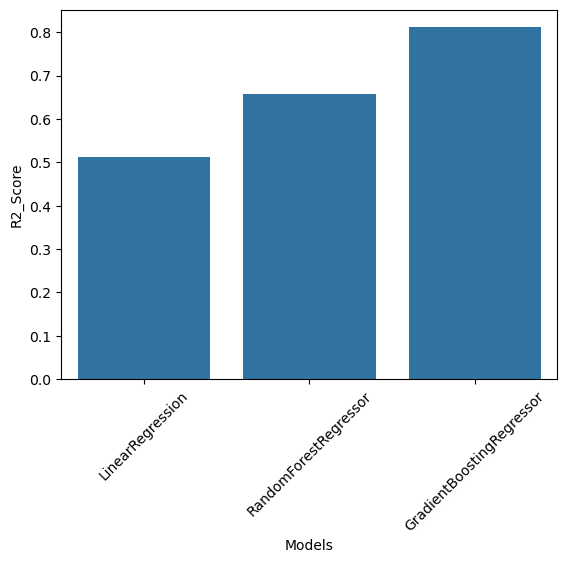

In [138]:
plt.Figure(figsize=(12,6))
sns.barplot(x='Models', y= 'R2_Score', data=final_data)
plt.xticks(rotation=45)

In [139]:
xgb = GradientBoostingRegressor()
final_Xgb = xgb.fit(x,y)

In [140]:
jb.dump(final_Xgb, "Car_Price_Predictor")

['Car_Price_Predictor']

In [141]:
model = jb.load('Car_Price_Predictor')

In [142]:
print(model.feature_names_in_)

['Present_Price' 'Kms_Driven' 'Fuel_Type' 'Seller_Type' 'Transmission'
 'Owner']


In [143]:
new_df = pd.DataFrame({
    "Present_Price": 5.59,
    "Kms_Driven":27000,
    "Fuel_Type":0,
    "Seller_Type":0,
    "Transmission":0,
    "Owner":0,
},index=[0])

In [144]:
model.predict(new_df)

array([3.51902578])

# **GUI**

In [147]:
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())

    model = jb.load('Car_Price_Predictor')
    data_new = pd.DataFrame({
    "Present_Price":p1,
    "Kms_Driven":p2,
    "Fuel_Type":p3,
    "Seller_Type":p4,
    "Transmission":p5,
    "Owner":p6,
    }, index =[0])


    results = model.predict(data_new)
    Label(master, text="car Purchase Amount").grid(row=8)
    Label(master, text=results).grid(row=9)
    print("Car pruchase amount", results[0])

master = Tk()
master.title("car Prediction using Machine Learning")
Label  = Label(master, text="Car Prediction Using Machine learning", bg='black', fg='white').grid(row=0, columnspan=2)


Label(master, text="Present_Price").grid(row=1)
Label(master, text="Kms_Driven").grid(row=2)
Label(master, text="Fuel_Type").grid(row=3)
Label(master, text="Seller_Type").grid(row=4)
Label(master, text="Transmission").grid(row=5)
Label(master, text="Owner").grid(row=6)

e1 = entry(master)
e2 = entry(master)
e3 = entry(master)
e4 = entry(master)
e5 = entry(master)
e6 = entry(master)


e1.get(row=1, column=1)
e2.get(row=2, column=1)
e3.get(row=3, column=1)
e4.get(row=4, column=1)
e5.get(row=5, column=1)
e6.get(row=6, column=1)

button(master, text="Predict", command=show_entry_fields).grid(row=7, columnspan=2 )
mainloop()




    

TypeError: 'module' object is not callable